# Twitter US Airline Sentiment

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The dataset has the following columns:
- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

Objective:
To implement the following techniques:
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
1) Bag of words
2) Tf-idf
- Build the classification model.
- Evaluate the Model.

**Steps and tasks:**


Step 1. Import the libraries, load dataset, print shape of data, data description.

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np



In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tweets.csv')

In [103]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [104]:
df.shape

(14640, 15)

Step 2. Understand of data-columns:

a. Drop all other columns except “text” and “airline_sentiment”.

b. Check the shape of data.

c. Print first 5 rows of data.

In [105]:
#2a - Drop all other columns except “text” and “airline_sentiment”.
data = df[['text', 'airline_sentiment']]


In [106]:
#2b - Check the shape of data
data.shape

(14640, 2)

In [107]:
#checking columns for NULL Values
data.isnull().sum(axis=0)   

text                 0
airline_sentiment    0
dtype: int64

In [108]:
#2c. Print first 5 rows of data.

pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


Step 3. Text pre-processing: Data preparation.

a. Html tag removal.

b. Tokenization.

c. Remove the numbers.

d. Removal of Special Characters and Punctuations.

e. Conversion to lowercase.

f. Lemmatize or stemming.

g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)

h. Print first 5 rows of data after pre-processing.


In [109]:
!pip install contractions

from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.

In [110]:
 #3.a Html tag removal
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [111]:
  #3.c Remove numbers

def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [112]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [113]:
#3.e Conversion to lowercase.
data.text = data.text.str.lower()
#df[key] = req_desc   
#return df
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text,airline_sentiment
0,@virginamerica what @dhepburn said.,neutral
1,@virginamerica plus you have added commercials to the experience... tacky.,positive
2,@virginamerica i did not today... must mean i need to take another trip!,neutral
3,"@virginamerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@virginamerica and it is a really big bad thing about it,negative


In [114]:
print('Unique Labels: '+str(data.airline_sentiment.unique()))
# Step 3.a, c, d & e 
data = clean_text(data, 'text')
X = list(data.text)
Y = data.iloc[:, 1:2].values

Unique Labels: ['neutral' 'positive' 'negative']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [115]:
import nltk as nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [116]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
print(data.text)

0                                                                                                                                        [virginamerica, what, dhepburn, said]
1                                                                                             [virginamerica, plus, you, have, added, commercials, to, the, experience, tacky]
2                                                                                            [virginamerica, i, did, not, today, must, mean, i, need, to, take, another, trip]
3                                      [virginamerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]
4                                                                                                          [virginamerica, and, it, is, a, really, big, bad, thing, about, it]
                                                                                         ...                                 

In [119]:
#3.f Lemmatizing    
X = list(data.text)
wordnet_lemmatizer = WordNetLemmatizer()
#Performing Lemmatization on all words
for i, sent in tqdm(enumerate(X)):
    for j, word in enumerate(sent): 
        sent[j] = wordnet_lemmatizer.lemmatize(word, pos='v')
    X[i] = sent
    


14640it [00:00, 15061.16it/s]


In [120]:
#3.g Join the words in the list to convert back to text string
for i, sent in enumerate(X):
    X[i] = ' '.join(sent)
X = pd.DataFrame(data={'text': X})
    
#3.h. Print first 5 rows of data after pre-processing.
for i in range(5):
    print(X.text[i])

virginamerica what dhepburn say
virginamerica plus you have add commercials to the experience tacky
virginamerica i do not today must mean i need to take another trip
virginamerica it be really aggressive to blast obnoxious entertainment in your guests face they have little recourse
virginamerica and it be a really big bad thing about it


Step 4. Vectorization:
a. Use CountVectorizer.
b. Use TfidfVectorizer.

In [121]:
#4.a. Use CountVectorizer.
count_vect = CountVectorizer()
X_C_vector = count_vect.fit_transform(list(X.text)).toarray()
print('Vocabulary: ')
print(count_vect.vocabulary_)
print('\nShape of CountVector: '+str(X_C_vector.shape))


Vocabulary: 
{'virginamerica': 12108, 'what': 12342, 'dhepburn': 2740, 'say': 10028, 'plus': 8985, 'you': 12679, 'have': 4543, 'add': 130, 'commercials': 1990, 'to': 11429, 'the': 11218, 'experience': 3481, 'tacky': 11046, 'do': 2923, 'not': 8199, 'today': 11433, 'must': 7870, 'mean': 7458, 'need': 7966, 'take': 11058, 'another': 504, 'trip': 11594, 'it': 6447, 'be': 961, 'really': 9446, 'aggressive': 214, 'blast': 1131, 'obnoxious': 8307, 'entertainment': 3281, 'in': 6174, 'your': 12692, 'guests': 4440, 'face': 3526, 'they': 11268, 'little': 7072, 'recourse': 9498, 'and': 457, 'big': 1082, 'bad': 840, 'thing': 11277, 'about': 46, 'seriously': 10182, 'would': 12562, 'pay': 8733, 'flight': 3766, 'for': 3943, 'seat': 10107, 'that': 11212, 'this': 11292, 'playingit': 8951, 'only': 8425, 'fly': 3866, 'va': 12005, 'yes': 12659, 'nearly': 7962, 'every': 3390, 'time': 11375, 'vx': 12163, 'ear': 3088, 'worm': 12535, 'will': 12430, 'go': 4282, 'away': 794, 'miss': 7679, 'prime': 9174, 'opportun

In [122]:
#4.b. Use TfidfVectorizer.
tfidf_vect = TfidfVectorizer()
X_T_vector = tfidf_vect.fit_transform(list(X.text)).toarray()
print('\nTF-IDF:')
print(tfidf_vect.idf_)
print('Shape of TF-IDF Vector'+str(X_T_vector.shape))


TF-IDF:
[5.04250501 9.89843391 9.89843391 ... 9.89843391 8.98214318 9.89843391]
Shape of TF-IDF Vector(14640, 12754)



Step 5. Fit and evaluate model using both type of vectorization.


Shape of X_train: (10248, 12754)
Shape of Y_train: (10248,)
Shape of X_test: (4392, 12754)
Shape of Y_test: (4392,)

Training Model on CountVectorizer Data!
Accuracy of Model using CountVectorizer: 0.7518


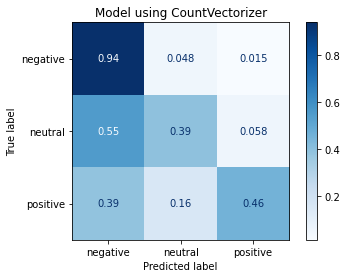

In [123]:
# Encoding categorical data
enc = OneHotEncoder()
Y_enc = enc.fit_transform(Y).toarray()
Y_enc = np.argmax(Y_enc, axis=1)
labels = ['negative', 'neutral', 'positive']

#Step 5.a Model Using Count Vectorizer
# Split data into training and testing set.
X_train, X_test, Y_train, Y_test = train_test_split(X_C_vector, Y_enc, 
                                                    test_size=0.3, 
                                                    random_state=42)
print('\nShape of X_train: '+str(X_train.shape))
print('Shape of Y_train: '+str(Y_train.shape))
print('Shape of X_test: '+str(X_test.shape))
print('Shape of Y_test: '+str(Y_test.shape))
#Creating and fitting the model
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
print('\nTraining Model on CountVectorizer Data!')
forest = forest.fit(X_train, Y_train)
#Evaluating the Model
Y_pred = forest.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy of Model using CountVectorizer: {0:.4f}'.format(acc))
#plotting confusion matrix
disp = plot_confusion_matrix(forest, X_test, Y_test, display_labels=labels,
                      cmap=plt.cm.Blues , normalize='true')
disp.ax_.set_title('Model using CountVectorizer')
plt.show()



Shape of X_train: (10248, 12754)
Shape of Y_train: (10248,)
Shape of X_test: (4392, 12754)
Shape of Y_test: (4392,)

Training Model on TF-IDF Data!
Accuracy of Model using TF-IDF: 0.7527


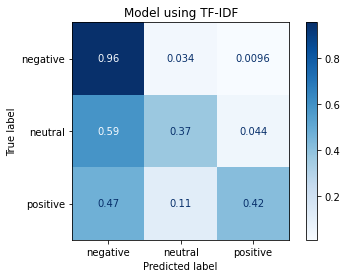

In [124]:
#Step 5.b Model Using TF-IDF
X_train, X_test, Y_train, Y_test = train_test_split(X_T_vector, Y_enc, 
                                                    test_size=0.3, 
                                                    random_state=42)
print('\nShape of X_train: '+str(X_train.shape))
print('Shape of Y_train: '+str(Y_train.shape))
print('Shape of X_test: '+str(X_test.shape))
print('Shape of Y_test: '+str(Y_test.shape))
#Creating and fitting the model
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
print('\nTraining Model on TF-IDF Data!')
forest = forest.fit(X_train, Y_train)
#Evaluating the Model
Y_pred = forest.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy of Model using TF-IDF: {0:.4f}'.format(acc))
#plotting confusion matrix
disp = plot_confusion_matrix(forest, X_test, Y_test, display_labels=labels,
                      cmap=plt.cm.Blues , normalize='true')
disp.ax_.set_title('Model using TF-IDF')
plt.show()

Step 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset.

Preprocessing involves getting the data document and corpus ready for analysis, by removing first unnacessary characters, e.g. the HTML tags and special characters and numbers to ensure that only relevant text remains.

The second key step is to then remove the stop words to reduce the number of available words (features).

Application of Bag of words technique then takes the words and converts that into numerical vectors. Bag of words is a simple technique that treats all words equally.

However, in relation Tf-idf (term frequency and inverse document frequency) gives a measure that takes the importance of words into account.

If we look at the two models above, using count vectorizer and Tf-idf, the accuracy of both models is very similar, approximlatey 75%.

The problem with the model performance might be due to application of classical machine learning algorithm instead of using deep learning techniques.

